In [111]:
"""
██████╗  █████╗ ██████╗ ███████╗██████╗     ██████╗ ██╗      ██████╗ ████████╗
██╔══██╗██╔══██╗██╔══██╗██╔════╝██╔══██╗    ██╔══██╗██║     ██╔═══██╗╚══██╔══╝
██████╔╝███████║██████╔╝█████╗  ██████╔╝    ██████╔╝██║     ██║   ██║   ██║
██╔═══╝ ██╔══██║██╔═══╝ ██╔══╝  ██╔══██╗    ██╔═══╝ ██║     ██║   ██║   ██║
██║     ██║  ██║██║     ███████╗██║  ██║    ██║     ███████╗╚██████╔╝   ██║
╚═╝     ╚═╝  ╚═╝╚═╝     ╚══════╝╚═╝  ╚═╝    ╚═╝     ╚══════╝ ╚═════╝    ╚═╝
@Title    : 数量柔性契约下的政企三方联合储备决策研究
@Author   : GONG Lingjun, JIANG Xingyu
@Created  : 2024-03-05
@Revision : 2024-03-05
@Submit   : Nan
@Descrip  : Fig.1 Comparison of government reserves under two models
TODO: 调整坐标刻度
"""


'\n██████╗  █████╗ ██████╗ ███████╗██████╗     ██████╗ ██╗      ██████╗ ████████╗\n██╔══██╗██╔══██╗██╔══██╗██╔════╝██╔══██╗    ██╔══██╗██║     ██╔═══██╗╚══██╔══╝\n██████╔╝███████║██████╔╝█████╗  ██████╔╝    ██████╔╝██║     ██║   ██║   ██║\n██╔═══╝ ██╔══██║██╔═══╝ ██╔══╝  ██╔══██╗    ██╔═══╝ ██║     ██║   ██║   ██║\n██║     ██║  ██║██║     ███████╗██║  ██║    ██║     ███████╗╚██████╔╝   ██║\n╚═╝     ╚═╝  ╚═╝╚═╝     ╚══════╝╚═╝  ╚═╝    ╚═╝     ╚══════╝ ╚═════╝    ╚═╝\n@Title    : 数量柔性契约下的政企三方联合储备决策研究\n@Author   : GONG Lingjun, JIANG Xingyu\n@Created  : 2024-03-05\n@Revision : 2024-03-05\n@Submit   : Nan\n@Descrip  : Fig.1 Comparison of government reserves under two models\nTODO: 调整坐标刻度\n'

In [112]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa: F401
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from mpl_toolkits.mplot3d import Axes3D

# initial settings
# mpl.rcParams["svg.fonttype"] = "none"
plt.style.use(["science", "grid", "no-latex"])
%config InlineBackend.figure_format = 'svg'


In [113]:
# Grid data X, Y and meshgrid. X -> \rho, Y -> w_1
X, Y = np.meshgrid(np.linspace(7 / 16, 1, 15), np.linspace(695 / 7, 225, 15))

# Set parameter values
U, MU = 20000, 10000
M = 300
C = 25
P0, P1 = 100, 250
W0 = 30
M0, M1 = 20, 25
HG, HM, HS = 15, 10, 5
S, V = 10, 5


In [114]:
# Calculate the values of cost_government under benchmark (q_0)) and mainmodel (qc, q1, q2)
q0 = U * (1 - (P0 + HS - S) / (X * (M - S)))
qc = U * (1 - (P0 + HG - S) / (X * (P1 - S)))
q1 = U * (1 - (W0 + M0 + HM - S) / (X * (Y + M1 - S))) - qc
q2 = U * (1 - (C + HS - V) / (X * (Y - V))) - q1 - qc

benchmark_profit_supply = (W0 - C) * q0
mainmodel_profit_supply = (
    (W0 - C) * (qc + q1)
    - (C + HS - V) * q2
    + X * (Y - V) * (q2 - ((qc + q1 + q2) ** 2 - (qc + q1) ** 2) / (2 * U))
)

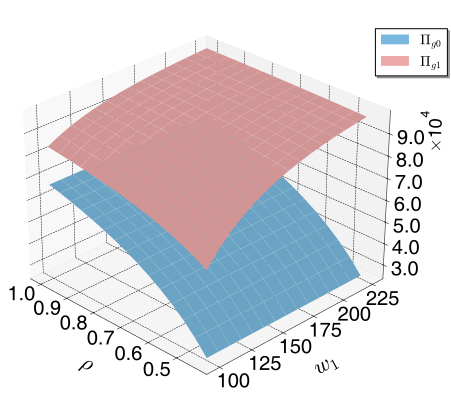

In [122]:
# Create the figure and axes objects
fig = plt.figure(figsize=(7, 5.5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Plot the surfaces
ax.plot_surface(X, Y, benchmark_profit_supply, label="benchmark", color="#79B8DF")
ax.plot_surface(X, Y, mainmodel_profit_supply, label="mainModel", color="#EDA8A8")

ax.invert_xaxis()
ax.set_xlabel("$\\rho $", size=22, labelpad=10)
ax.set_ylabel("$w_1$", size=22, labelpad=10)
ax.tick_params(labelsize=18)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_minor_locator(MultipleLocator(25))
ax.zaxis.set_minor_locator(MultipleLocator(10000))
ax.zaxis.get_offset_text().set(size=18)
z_formatter = ScalarFormatter(useMathText=True)
z_formatter.set_scientific(True)
z_formatter.set_powerlimits((-2, 2))
z_axis = ax.get_zaxis()
z_axis.set_major_formatter(z_formatter)

# show legend
colors = ["#79B8DF", "#EDA8A8"]
legend_labels = ["$\\Pi_{g0}$", "$\\Pi_{g1}$"]
legend_handles = [Rectangle((0, 0), 1, 1, fc=color) for color in colors]
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    fontsize=14,
    frameon=True,
    fancybox=False,
    shadow=True,
    edgecolor="black",
    loc="lower right",
    bbox_to_anchor=(1.14, 0.8),
)

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_zticklabels(), visible=False)

for x, text in zip(
    [0.5, 0.6, 0.7, 0.8, 0.9, 1.00], ["0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
):
    ax.text(x=x, y=65, z=23586.24, s=text, fontsize=20)

for y, text in zip(
    [85, 109, 133, 157, 181, 205],
    ["100", "125", "150", "175", "200", "225"],
):
    ax.text(x=0.34, y=y, z=23586.24, s=text, fontsize=20)

for z, text in zip(
    [27000, 37000, 47000, 57000, 67000, 77000, 87000],
    ["3.0", "4.0", "5.0", "6.0", "7.0", "8.0", "9.0"],
):
    ax.text(x=0.37, y=234, z=z, s=text, fontsize=20)

# # Set the view angle and display the plot
ax.view_init(elev=28, azim=-45)
plt.show()